In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('logging_d_1.csv', header=None)
df

FileNotFoundError: [Errno 2] No such file or directory: 'logging_d_1.csv'

In [121]:
left_eye_ids = list(range(36, 42))
right_eye_ids = list(range(42, 48))

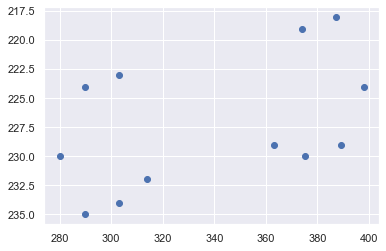

In [122]:
xs = [df.iloc[0][pt * 2] for pt in left_eye_ids + right_eye_ids]
ys = [df.iloc[0][pt * 2 + 1] for pt in left_eye_ids + right_eye_ids]
plt.scatter(xs, ys)
plt.gca().invert_yaxis()

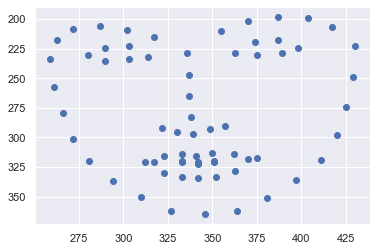

In [123]:
xs = [df.iloc[0][pt * 2] for pt in range(68)]
ys = [df.iloc[0][pt * 2 + 1] for pt in range(68)]
plt.scatter(xs, ys)
plt.gca().invert_yaxis()

In [124]:
left_eye_top_x = (df[37 * 2] + df[38 * 2]) / 2.
left_eye_top_y = (df[37 * 2 + 1] + df[38 * 2 + 1]) / 2.
left_eye_bot_x = (df[40 * 2] + df[41 * 2]) / 2.
left_eye_bot_y = (df[40 * 2 + 1] + df[41 * 2 + 1]) / 2.
df['left_eye_height'] = np.sqrt(
    (left_eye_top_x - left_eye_bot_x)**2 + \
    (left_eye_top_y - left_eye_bot_y)**2)

In [125]:
right_eye_top_x = (df[43 * 2] + df[44 * 2]) / 2.
right_eye_top_y = (df[43 * 2 + 1] + df[44 * 2 + 1]) / 2.
right_eye_bot_x = (df[46 * 2] + df[47 * 2]) / 2.
right_eye_bot_y = (df[46 * 2 + 1] + df[47 * 2 + 1]) / 2.
df['right_eye_height'] = np.sqrt(
    (right_eye_top_x - right_eye_bot_x)**2 + \
    (right_eye_top_y - right_eye_bot_y)**2)

In [126]:
df['mouth_height'] = np.sqrt(
    (df[57 * 2] - df[51 * 2])**2 + \
    (df[57 * 2 + 1] - df[51 * 2 + 1])**2)
df['mouth_width'] = np.sqrt(
    (df[54 * 2] - df[48 * 2])**2 + \
    (df[54 * 2 + 1] - df[48 * 2 + 1])**2)

In [127]:
df['mouth_diag_1'] = np.sqrt(
    (df[56 * 2] - df[50 * 2])**2 + \
    (df[56 * 2 + 1] - df[50 * 2 + 1])**2)
df['mouth_diag_2'] = np.sqrt(
    (df[58 * 2] - df[52 * 2])**2 + \
    (df[58 * 2 + 1] - df[52 * 2 + 1])**2)

In [128]:
df['left_eye_width'] = np.sqrt(
    (df[39 * 2] - df[36 * 2])**2 + \
    (df[39 * 2 + 1] - df[36 * 2 + 1])**2)
df['right_eye_width'] = np.sqrt(
    (df[45 * 2] - df[42 * 2])**2 + \
    (df[45 * 2 + 1] - df[42 * 2 + 1])**2)

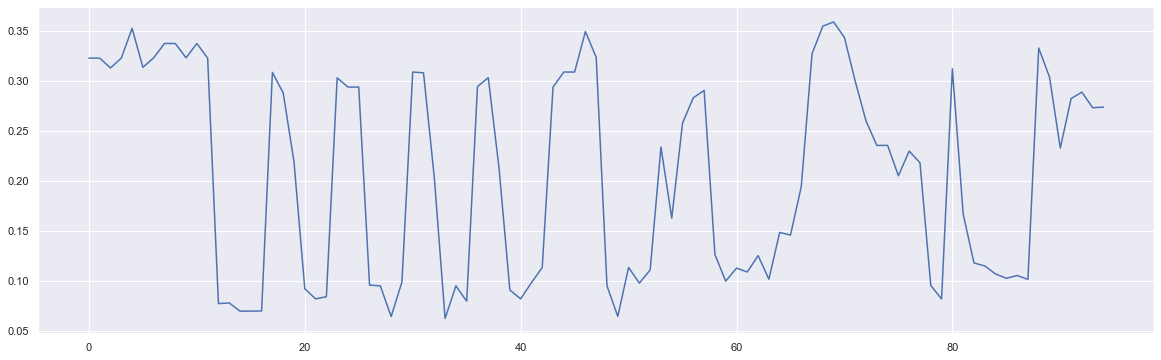

In [129]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df.left_eye_height / (df.left_eye_width + 1e-6))

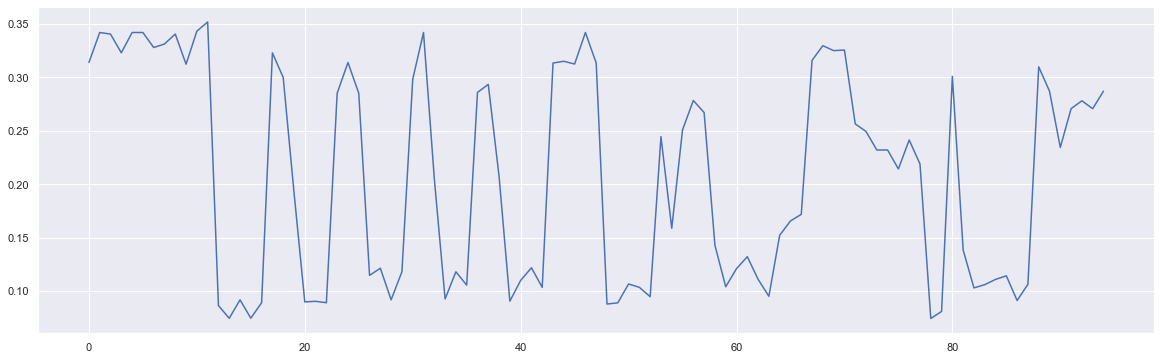

In [130]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df.right_eye_height / (df.right_eye_width + 1e-6))

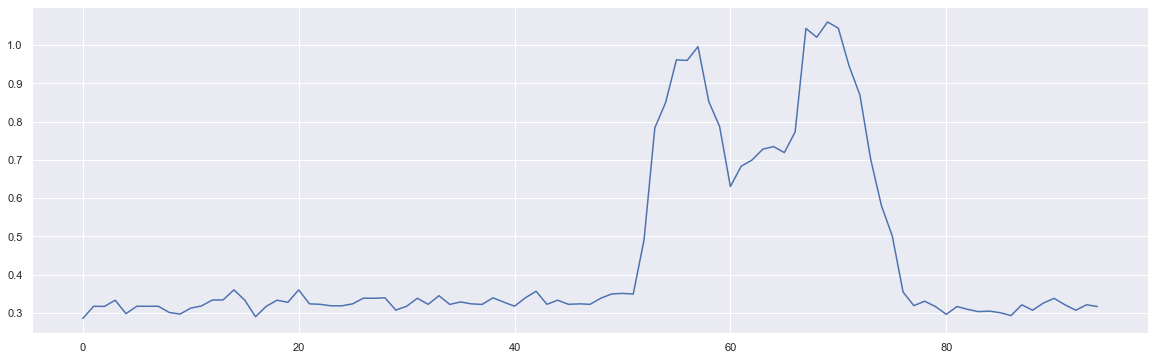

In [131]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df.mouth_height / (df.mouth_width + 1e-6))

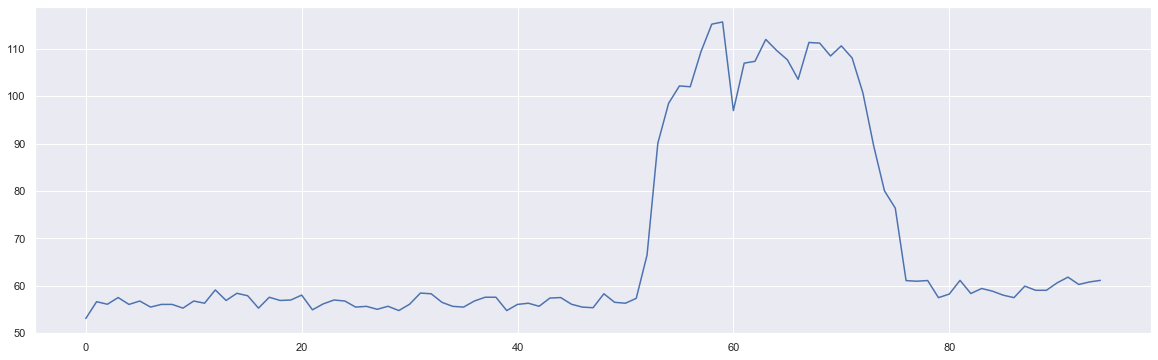

In [132]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=(df.mouth_diag_1 + df.mouth_diag_2))

In [133]:
dfma = df.rolling(window=3).mean()
dfma = dfma[dfma['right_eye_height'].notna()]
dfma

,0,1,2,3,4,5,6,7,8,9,...,134,135,left_eye_height,right_eye_height,mouth_height,mouth_width,mouth_diag_1,mouth_diag_2,left_eye_width,right_eye_width
2,259.000000,234.666667,261.666667,258.000000,266.666667,280.333333,272.333333,302.000000,281.333333,321.000000,...,333.000000,320.666667,11.000000,11.745594,19.350914,63.089878,28.063221,27.236773,34.415294,35.355339
3,259.333333,234.333333,262.000000,257.666667,266.666667,280.333333,272.000000,301.666667,281.000000,321.000000,...,333.000000,321.000000,11.000000,11.745594,20.349593,63.071388,29.017247,27.754796,34.415294,35.025453
4,259.666667,235.000000,262.000000,258.333333,266.666667,280.666667,272.333333,302.333333,281.333333,321.333333,...,333.000000,321.000000,11.333333,11.745594,20.042923,63.404350,28.778671,27.802878,34.400604,35.025453
5,260.000000,234.333333,262.000000,257.666667,266.666667,280.000000,272.000000,301.333333,281.000000,320.666667,...,333.333333,321.000000,11.333333,11.762858,20.051251,63.404350,29.005470,27.802878,34.376857,35.025453
6,260.000000,234.666667,262.000000,258.333333,267.000000,280.333333,272.333333,302.000000,281.333333,321.000000,...,333.666667,321.000000,11.337119,11.928062,19.718314,63.404350,28.534625,27.602899,34.376857,35.355339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,260.666667,239.000000,263.000000,261.666667,268.000000,283.666667,274.000000,304.333333,283.333333,322.666667,...,334.333333,311.666667,9.447114,9.977638,22.311022,68.923495,30.646775,28.945280,32.459367,35.844194
91,260.666667,238.666667,263.000000,261.666667,268.000000,283.666667,274.000000,304.333333,283.333333,323.000000,...,334.333333,311.666667,8.795124,9.292663,22.638729,68.923495,31.118057,29.399802,32.126663,35.128935
92,260.666667,239.000000,263.000000,261.666667,268.000000,283.333333,274.000000,304.333333,283.666667,322.666667,...,333.666667,311.333333,8.629327,9.263941,22.311022,69.253988,31.361727,29.567023,32.126663,35.407269
93,260.666667,238.666667,263.000000,261.666667,268.000000,283.333333,274.000000,304.333333,284.000000,323.000000,...,334.000000,311.333333,9.221086,9.782419,22.032973,69.584481,31.128766,29.861745,32.753024,35.788896


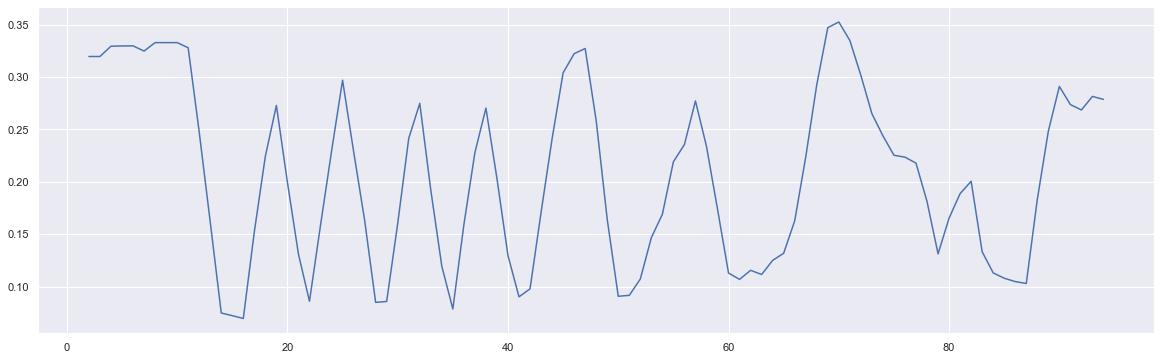

In [134]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=dfma.index, y=dfma.left_eye_height / (dfma.left_eye_width + 1e-6))

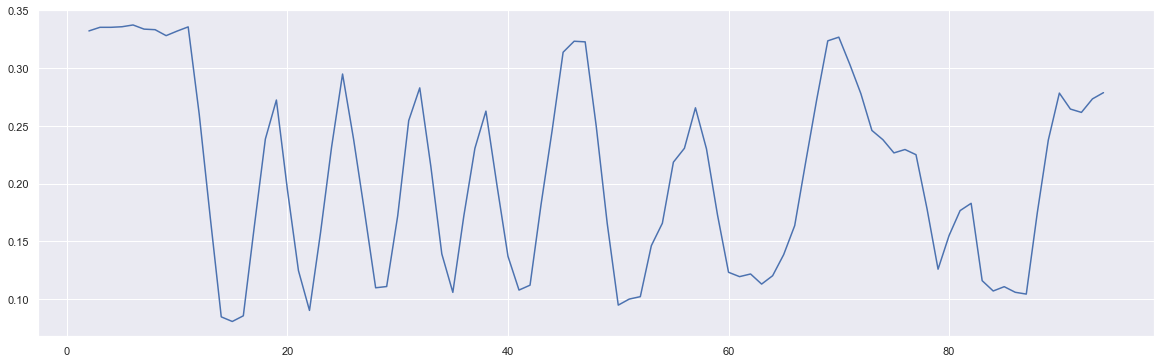

In [135]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=dfma.index, y=dfma.right_eye_height / (dfma.right_eye_width + 1e-6))

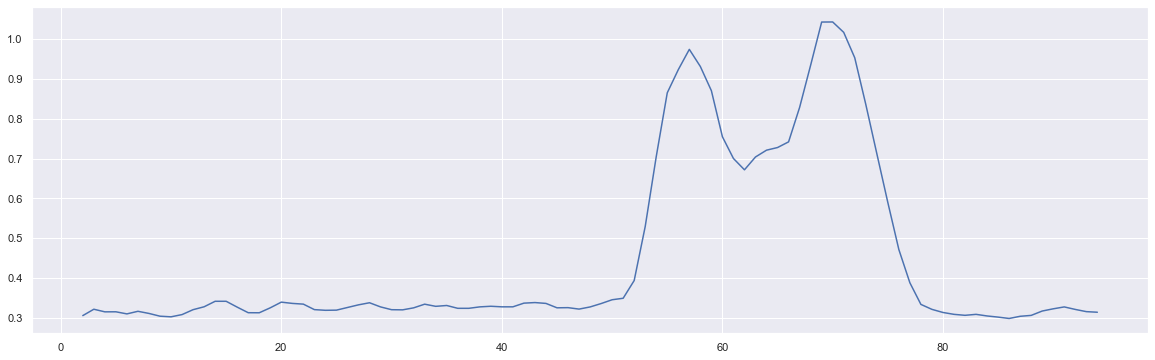

In [136]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=dfma.index, y=dfma.mouth_height / (dfma.mouth_width + 1e-6))